In [1]:
import pandas as pd
from controllers.features import NON_FEATURE_COLS, Features, get_scaler


btc_df = pd.read_csv('data/BTC_Data.csv', index_col='Unnamed: 0')
btc_df['TARGET'] = 'DUMMY'
eth_df = pd.read_csv('data/ETH_Data.csv', index_col='Unnamed: 0')
eth_df['TARGET'] = 'DUMMY'

In [2]:
btc_features = Features.add_features(btc_df)
eth_features = Features.add_features(eth_df)

# SOM

In [3]:
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler

In [18]:
def som_normalize(df):
    output_df = df.drop(['TARGET'], axis=1).copy().tail(5000)

    scaler = MinMaxScaler()
    X = scaler.fit_transform(output_df.T.values)
    return X, output_df.T

som_btc_normalized, som_btc_features = som_normalize(btc_features)
som_eth_normalized, som_eth_features = som_normalize(eth_features)

In [53]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

def som(X, df):
    som = MiniSom(10, 10, len(df.columns), learning_rate=0.5, sigma=1, random_seed=0)
    som.random_weights_init(X)
    som.train_batch(X, 10000, verbose=True)
    return som

def graph_som(som, X, df, name):
    plt.figure(figsize=(20, 10))
    for ix in range(len(X)):
        winner = som.winner(X[ix])
        plt.text(winner[0], winner[1], df.index[ix], bbox=dict(facecolor='white', alpha=0.5, lw=0)) 
    plt.imshow(som.distance_map())
    plt.grid(False)
    plt.title(f'{name} - Self Organizing Maps');

def print_rankings(som, X, df):
    for ix in range(len(X)):
        winner = som.winner(X[ix])
        print(winner[0], winner[1], df.index[ix])


 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.03937537988296623
7 3 BLOCK_SIZE
8 3 HASH_RATE
9 2 DIFFICULTY
7 3 TRANSACTION_RATE
7 3 ACTIVE_ADDRESSES
7 3 NEW_ADDRESSES
8 6 ROC_3
7 7 ROC_6
8 7 ROC_12
9 7 ROC_24
1 2 RSI_3
1 0 RSI_7
2 1 RSI_14
2 0 RSI_32
9 0 ATR_3
9 1 ATR_7
9 1 ATR_14
9 2 ATR_32
9 9 WILLIAMS_3
7 0 WILLIAMS_7
6 0 WILLIAMS_14
6 1 WILLIAMS_32
2 4 MI_3
3 4 MI_9
3 4 MI_18
6 9 CCI_5
4 9 CCI_10
2 9 CCI_20
6 4 BASP_BUY_10
6 5 BASP_SELL_10
6 4 BASP_BUY_20
6 6 BASP_SELL_20
6 4 BASP_BUY_40
6 6 BASP_SELL_40
9 2 BB_UPPER_5
9 2 BB_MIDDLE_5
9 2 BB_LOWER_5
9 2 BB_UPPER_10
9 2 BB_MIDDLE_10
9 2 BB_LOWER_10
9 2 BB_UPPER_20
9 2 BB_MIDDLE_20
9 2 BB_LOWER_20
9 4 ER_5
9 4 ER_10
9 3 ER_15
9 3 ER_20
0 9 MACD_LOW
0 8 MACD_SIGNAL_LOW
1 7 MACD_MID
2 6 MACD_SIGNAL_MID
3 7 MACD_HIGH
4 7 MACD_SIGNAL_HIGH
4 0 ADX_3
3 2 ADX_7
4 2 ADX_14
4 3 ADX_21
0 4 STOCH_3
0 2 STOCH_7
0 1 STOCH_14
0 0 STOCH_21
9 5 STOCHRSI_3
9 5 STOCHRSI_7
9 5 STOCHRSI_14
9 5 STOCHRSI_21
9 2 BBWIDTH_5
9 2 BBWIDTH_10
9

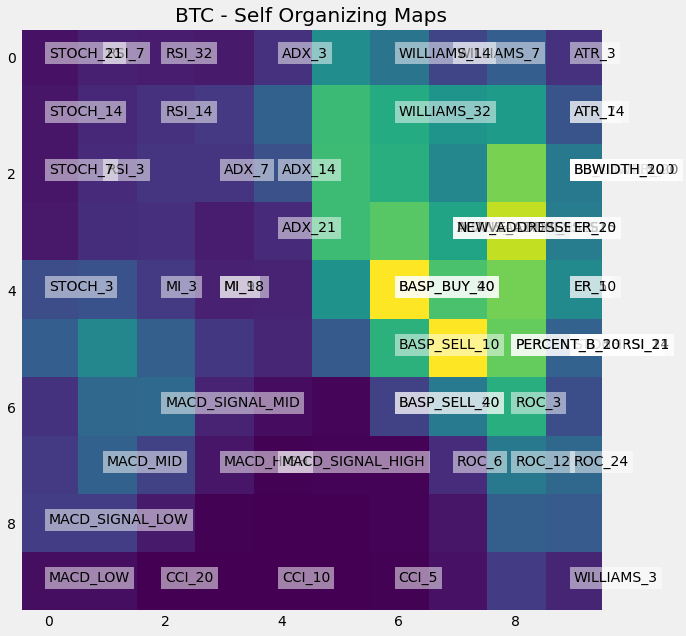

In [54]:
btc_som = som(som_btc_normalized, som_btc_features)
graph_som(btc_som, som_btc_normalized, som_btc_features, 'BTC')
print_rankings(btc_som, som_btc_normalized, som_btc_features)

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.07529452099939941
3 8 BLOCK_SIZE
3 8 HASH_RATE
4 9 DIFFICULTY
3 8 TRANSACTION_RATE
3 8 ACTIVE_ADDRESSES
3 8 NEW_ADDRESSES
2 9 ROC_3
1 9 ROC_6
1 8 ROC_12
0 9 ROC_24
7 4 RSI_3
8 7 RSI_7
9 8 RSI_14
9 9 RSI_32
4 9 ATR_3
4 9 ATR_7
4 9 ATR_14
4 9 ATR_32
6 1 WILLIAMS_3
1 2 WILLIAMS_7
0 3 WILLIAMS_14
1 4 WILLIAMS_32
6 6 MI_3
6 6 MI_9
6 6 MI_18
9 1 CCI_5
8 0 CCI_10
3 0 CCI_20
6 9 BASP_BUY_10
7 9 BASP_SELL_10
6 9 BASP_BUY_20
7 9 BASP_SELL_20
6 9 BASP_BUY_40
7 9 BASP_SELL_40
4 9 BB_UPPER_5
4 9 BB_MIDDLE_5
4 9 BB_LOWER_5
4 9 BB_UPPER_10
4 9 BB_MIDDLE_10
4 9 BB_LOWER_10
4 9 BB_UPPER_20
4 9 BB_MIDDLE_20
4 9 BB_LOWER_20
4 7 ER_5
4 7 ER_10
4 7 ER_15
4 7 ER_20
0 7 MACD_LOW
0 7 MACD_SIGNAL_LOW
1 6 MACD_MID
2 6 MACD_SIGNAL_MID
2 5 MACD_HIGH
3 5 MACD_SIGNAL_HIGH
0 0 ADX_3
5 4 ADX_7
4 3 ADX_14
4 2 ADX_21
9 3 STOCH_3
9 4 STOCH_7
9 5 STOCH_14
9 6 STOCH_21
5 8 STOCHRSI_3
5 8 STOCHRSI_7
5 8 STOCHRSI_14
5 8 STOCHRSI_21
4 9 BBWIDTH_5
4 9 BBWIDTH_10
4

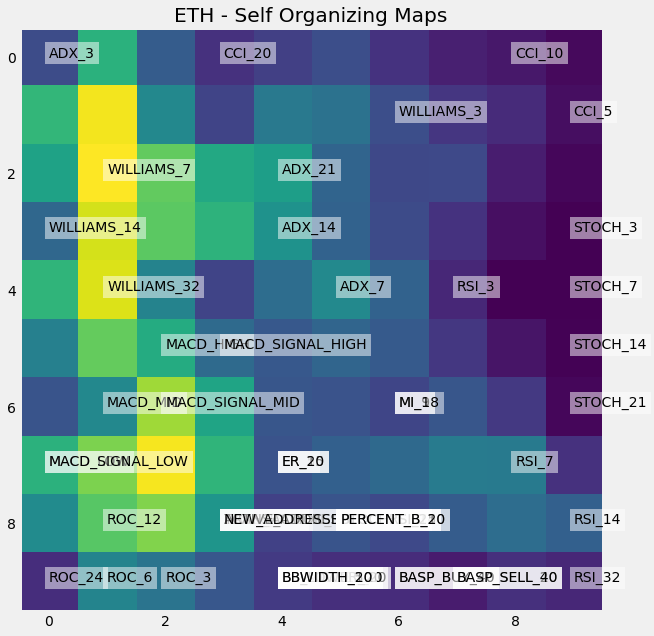

In [55]:
eth_som = som(som_eth_normalized, som_eth_features)
graph_som(eth_som, som_eth_normalized, som_eth_features, 'ETH')
print_rankings(eth_som, som_eth_normalized, som_eth_features)

# Experiement with XGBoost and SHAP

In [9]:
from xgboost import XGBClassifier
import shap

/home/williamharris/anaconda3/envs/tf/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/williamharris/anaconda3/envs/tf/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [28]:
def data(df, period_to_predict: int):
    df = df.copy()
    df["TARGET"] = list(map(lambda current, future: 0 if current > future else 1, df.close, df.close.shift(-period_to_predict)))
    non_features = ['TARGET'] + NON_FEATURE_COLS
    features = df.drop(non_features, axis=1).columns
    X, y = df.drop(non_features, axis=1), df.TARGET
    ct = get_scaler()
    X = ct.fit_transform(X)
    return X, y, features

In [29]:
def shap_beeswarm(X, y, features):
    X1000 = shap.utils.sample(X, 1000, random_state=0)
    model = XGBClassifier(random_state=0)
    model.fit(X, y)
    explainer = shap.Explainer(model.predict, X1000, feature_names=features)
    shap_values = explainer(X1000)
    shap.plots.beeswarm(shap_values, max_display=20)


In [30]:
X_btc_1, y_btc_1, btc_1_features = data(btc_features, 1)
X_btc_6, y_btc_6, btc_6_features = data(btc_features, 6)
X_btc_12, y_btc_12, btc_12_features = data(btc_features, 12)

In [31]:
X_eth_1, y_eth_1, eth_1_features = data(eth_features, 1)
X_eth_6, y_eth_6, eth_6_features = data(eth_features, 6)
X_eth_12, y_eth_12, eth_12_features = data(eth_features, 12)

### 1Hr Prediction

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[10:41:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Permutation explainer: 1001it [03:26,  4.63it/s]                          


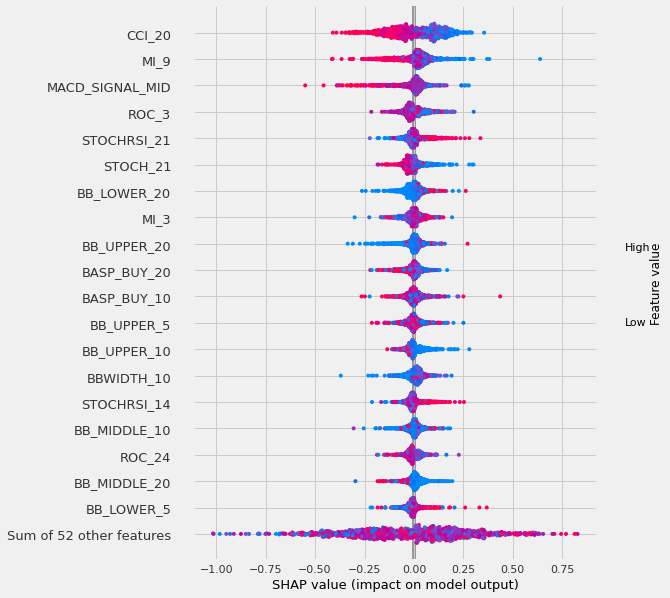

In [32]:
shap_beeswarm(X_btc_1, y_btc_1, btc_1_features)

(55556, 71)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[09:16:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Permutation explainer: 1001it [03:17,  4.81it/s]                          


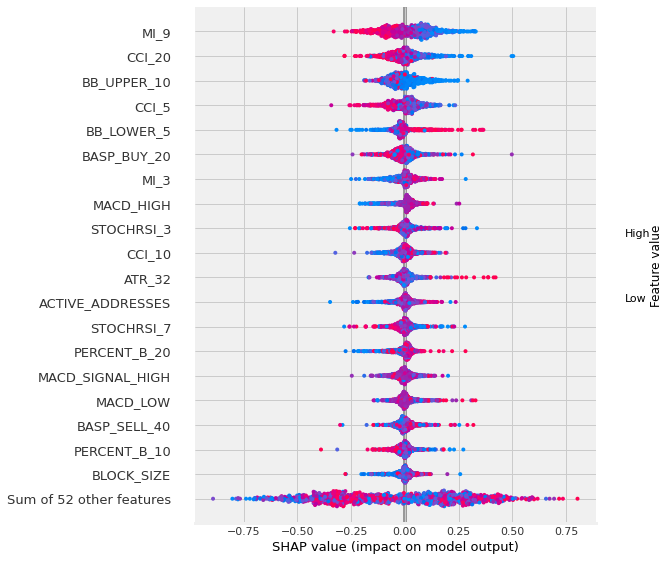

In [12]:
shap_beeswarm(X_eth_1, y_eth_1, eth_1_features)

### 6Hr Prediction

(81369, 71)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[09:20:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Permutation explainer: 1001it [03:34,  4.48it/s]                          


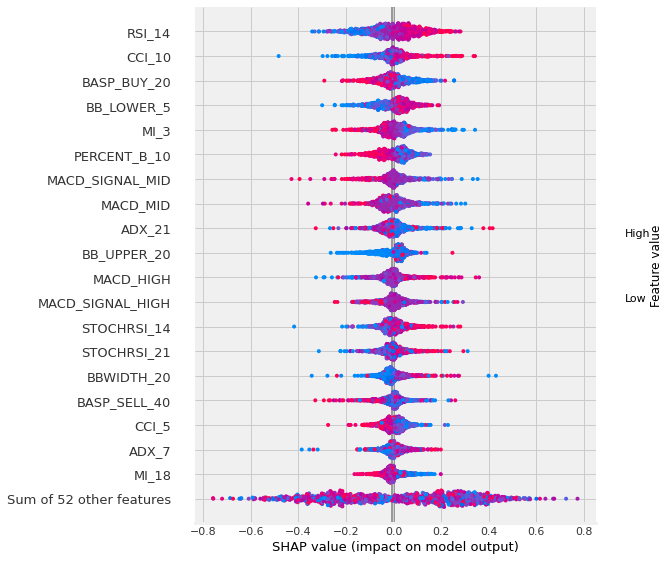

In [13]:
shap_beeswarm(X_btc_6, y_btc_6, btc_6_features)

(55556, 71)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[09:24:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Permutation explainer: 1001it [03:38,  4.29it/s]                          


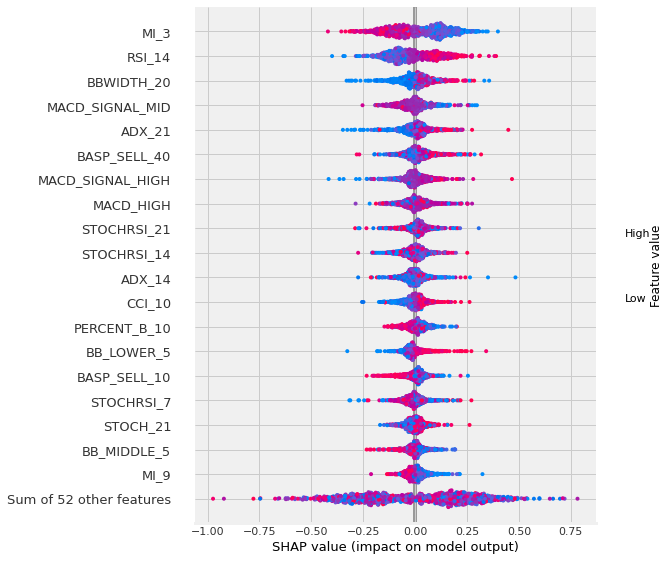

In [14]:
shap_beeswarm(X_eth_6, y_eth_6, eth_6_features)

### 12Hr Prediction

(81369, 71)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[09:29:02] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Permutation explainer: 1001it [03:37,  4.41it/s]                          


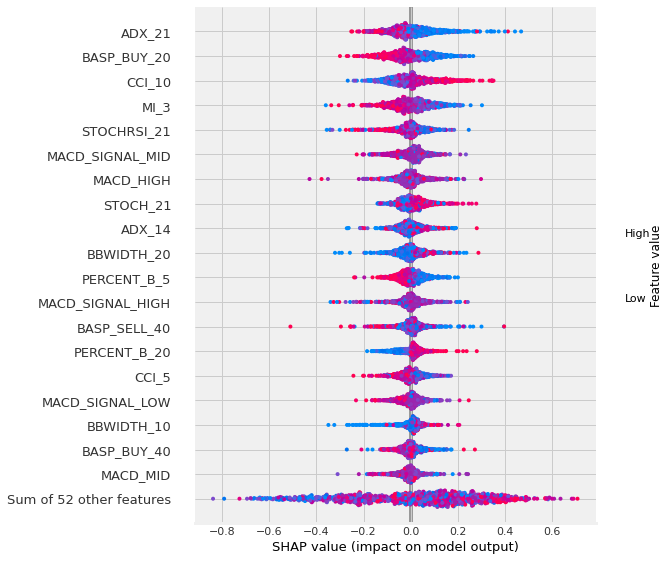

In [15]:
shap_beeswarm(X_btc_12, y_btc_12, btc_12_features)

(55556, 71)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[09:33:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Permutation explainer: 1001it [03:30,  4.54it/s]                          


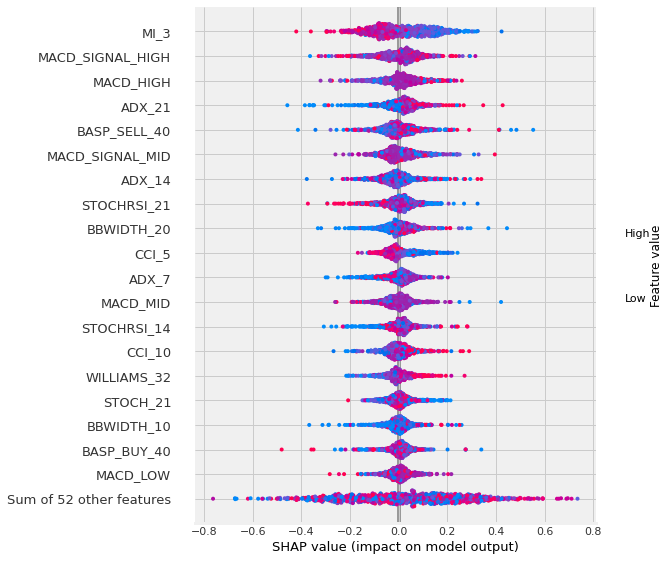

In [16]:
shap_beeswarm(X_eth_12, y_eth_12, eth_12_features)

# Variance Threshold, Mutual Information, RFE

In [45]:
import seaborn as sns
import numpy as np
from sklearn.feature_selection import RFE, VarianceThreshold, mutual_info_classif
import warnings
warnings.filterwarnings("ignore")


class FeatureSelection:
    @classmethod
    def corr(cls, df):
        corrmat = df.corr()
        _, ax = plt.subplots()
        mask = np.triu(np.ones_like(corrmat, dtype=bool))
        cmap = sns.diverging_palette(250, 15, as_cmap=True)
        sns.heatmap(corrmat, annot=True, annot_kws={"size": 10}, 
                        fmt="0.2f", mask=mask, cmap=cmap, vmax=.3, center=0,
                        square=False, linewidths=.5, cbar_kws={"shrink": 1})
        ax.set_title('Feature Correlation', fontsize=14, color='black')
        plt.show()

    @classmethod
    def variance_threshold(cls, df, threshold=0.1) -> pd.Series:
        df = df.drop(NON_FEATURE_COLS, axis=1)
        vt = VarianceThreshold(threshold = threshold)
        vt.fit(df)
        return pd.Series(vt.get_feature_names_out(df.columns), name='Variance_Threshold_Ranking').head(10)

    @classmethod
    def mutual_info(cls, X, y, features) -> pd.Series:
        mutual_info = mutual_info_classif(X, y, random_state=0)
        feature_mutual_info = list(zip(mutual_info, features))
        df = pd.DataFrame(feature_mutual_info, columns=['Estimated Mutual Information', 'Mutual_Information_Ranking'])
        return df[df['Estimated Mutual Information'] > 0].sort_values('Estimated Mutual Information', ascending=False).reset_index(drop=True).head(10)['Mutual_Information_Ranking']

    @classmethod
    def rfe(cls,  X, y, features) -> pd.Series:
        model = XGBClassifier(random_state=0, eval_metric='error')
        rfe = RFE(model, n_features_to_select=10, step=10, verbose=2)
        rfe.fit(X, y)
        return pd.Series(list(feature for feature, support in zip(features, rfe.support_) if support), name='RFE_Ranking').head(10)


### 1 Hour

In [46]:
var = FeatureSelection.variance_threshold(btc_features)
mutual_info_series = FeatureSelection.mutual_info(X_btc_1, y_btc_1, btc_1_features)
rfe_series = FeatureSelection.rfe(X_btc_1, y_btc_1, btc_1_features)
pd.concat([var, mutual_info_series, rfe_series], axis=1)

Fitting estimator with 71 features.
Fitting estimator with 61 features.
Fitting estimator with 51 features.
Fitting estimator with 41 features.
Fitting estimator with 31 features.
Fitting estimator with 21 features.
Fitting estimator with 11 features.


,Variance_Threshold_Ranking,Mutual_Information_Ranking,RFE_Ranking
0,BLOCK_SIZE,STOCH_7,RSI_14
1,HASH_RATE,MI_9,MI_9
2,TRANSACTION_RATE,BASP_BUY_10,CCI_20
3,ACTIVE_ADDRESSES,PERCENT_B_5,BASP_BUY_10
4,NEW_ADDRESSES,PERCENT_B_20,BASP_SELL_10
5,ROC_3,STOCH_3,BB_MIDDLE_20
6,ROC_6,WILLIAMS_7,BB_LOWER_20
7,ROC_12,CCI_5,MACD_HIGH
8,ROC_24,CCI_20,MACD_SIGNAL_HIGH
9,RSI_3,STOCHRSI_3,STOCH_21


In [47]:
var = FeatureSelection.variance_threshold(eth_features)
mutual_info_series = FeatureSelection.mutual_info(X_eth_1, y_eth_1, eth_1_features)
rfe_series = FeatureSelection.rfe(X_eth_1, y_eth_1, eth_1_features)
pd.concat([var, mutual_info_series, rfe_series], axis=1)

Fitting estimator with 71 features.
Fitting estimator with 61 features.
Fitting estimator with 51 features.
Fitting estimator with 41 features.
Fitting estimator with 31 features.
Fitting estimator with 21 features.
Fitting estimator with 11 features.


,Variance_Threshold_Ranking,Mutual_Information_Ranking,RFE_Ranking
0,TRANSACTION_RATE,STOCH_7,RSI_14
1,ACTIVE_ADDRESSES,BASP_BUY_10,MI_9
2,NEW_ADDRESSES,RSI_3,CCI_20
3,ROC_3,WILLIAMS_7,BASP_BUY_10
4,ROC_6,STOCHRSI_3,MACD_SIGNAL_HIGH
5,ROC_12,ROC_12,STOCH_21
6,ROC_24,PERCENT_B_20,STOCHRSI_3
7,RSI_3,WILLIAMS_32,STOCHRSI_7
8,RSI_7,MI_9,BBWIDTH_5
9,RSI_14,BB_UPPER_20,PERCENT_B_5


## 6 Hour

In [49]:
mutual_info_series = FeatureSelection.mutual_info(X_btc_6, y_btc_6, btc_6_features)
rfe_series = FeatureSelection.rfe(X_btc_6, y_btc_6, btc_6_features)
pd.concat([mutual_info_series, rfe_series], axis=1)

Fitting estimator with 71 features.
Fitting estimator with 61 features.
Fitting estimator with 51 features.
Fitting estimator with 41 features.
Fitting estimator with 31 features.
Fitting estimator with 21 features.
Fitting estimator with 11 features.


,Mutual_Information_Ranking,RFE_Ranking
0,MI_18,RSI_14
1,BB_MIDDLE_5,BASP_SELL_40
2,BASP_BUY_10,MACD_SIGNAL_MID
3,MI_9,MACD_HIGH
4,STOCHRSI_3,MACD_SIGNAL_HIGH
5,STOCH_7,ADX_14
6,BB_UPPER_5,ADX_21
7,STOCH_14,STOCHRSI_14
8,ADX_21,STOCHRSI_21
9,PERCENT_B_5,PERCENT_B_10


In [50]:
mutual_info_series = FeatureSelection.mutual_info(X_eth_6, y_eth_6, eth_6_features)
rfe_series = FeatureSelection.rfe(X_eth_6, y_eth_6, eth_6_features)
pd.concat([mutual_info_series, rfe_series], axis=1)

Fitting estimator with 71 features.
Fitting estimator with 61 features.
Fitting estimator with 51 features.
Fitting estimator with 41 features.
Fitting estimator with 31 features.
Fitting estimator with 21 features.
Fitting estimator with 11 features.


,Mutual_Information_Ranking,RFE_Ranking
0,MI_9,MI_3
1,BLOCK_SIZE,BASP_SELL_40
2,PERCENT_B_20,MACD_MID
3,BBWIDTH_5,MACD_SIGNAL_MID
4,ER_5,MACD_HIGH
5,RSI_32,MACD_SIGNAL_HIGH
6,ROC_6,ADX_21
7,PERCENT_B_5,STOCHRSI_7
8,ROC_3,STOCHRSI_21
9,BASP_BUY_10,BBWIDTH_20


## 12 Hour

In [51]:
mutual_info_series = FeatureSelection.mutual_info(X_btc_12, y_btc_12, btc_12_features)
rfe_series = FeatureSelection.rfe(X_btc_12, y_btc_12, btc_12_features)
pd.concat([mutual_info_series, rfe_series], axis=1)

Fitting estimator with 71 features.
Fitting estimator with 61 features.
Fitting estimator with 51 features.
Fitting estimator with 41 features.
Fitting estimator with 31 features.
Fitting estimator with 21 features.
Fitting estimator with 11 features.


,Mutual_Information_Ranking,RFE_Ranking
0,CCI_5,BASP_BUY_40
1,MI_18,BASP_SELL_40
2,MI_9,MACD_MID
3,STOCH_7,MACD_HIGH
4,BB_MIDDLE_5,MACD_SIGNAL_HIGH
5,BASP_BUY_10,ADX_14
6,BASP_BUY_20,ADX_21
7,RSI_14,STOCHRSI_7
8,MACD_LOW,STOCHRSI_21
9,ACTIVE_ADDRESSES,BBWIDTH_20


In [52]:
mutual_info_series = FeatureSelection.mutual_info(X_eth_12, y_eth_12, eth_12_features)
rfe_series = FeatureSelection.rfe(X_eth_12, y_eth_12, eth_12_features)
pd.concat([mutual_info_series, rfe_series], axis=1)

Fitting estimator with 71 features.
Fitting estimator with 61 features.
Fitting estimator with 51 features.
Fitting estimator with 41 features.
Fitting estimator with 31 features.
Fitting estimator with 21 features.
Fitting estimator with 11 features.


,Mutual_Information_Ranking,RFE_Ranking
0,CCI_5,MI_3
1,MI_9,BASP_SELL_40
2,STOCH_3,MACD_SIGNAL_MID
3,STOCHRSI_7,MACD_HIGH
4,CCI_20,MACD_SIGNAL_HIGH
5,BASP_BUY_20,ADX_7
6,MACD_SIGNAL_HIGH,ADX_14
7,BBWIDTH_5,ADX_21
8,CCI_10,STOCHRSI_21
9,BBWIDTH_10,BBWIDTH_20
